<a href="https://colab.research.google.com/github/SinghReena/MachineLearning/blob/master/ML_class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Introduction

In [ ]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn.linear_model as linear_module

In [ ]:
#@title Generate data
np.random.seed(4)
arr = np.arange(15)
x = np.add(arr, np.round(np.random.uniform(-0.3, 0.3, 15), 2))
np.random.shuffle(x)
y = np.add(x, np.round(np.random.uniform(1.7, 2.3, 15), 2))
df = pd.DataFrame({'x' : x, 'y': y})

## Relationship between variables x and y

What is the relationship between the variables?

Given x can we **predict** y?

In [ ]:
df

,x,y
0,10.17,12.14
1,3.13,5.09
2,6.70,8.44
3,4.12,5.93
4,13.29,15.51
5,1.03,3.24
6,0.28,2.54
7,10.82,13.04
8,13.80,16.00
9,2.28,4.14


## Model

It looks like y might be x + 2.

**`y = x+2`** is the model.  It is possible that there are other models.

`y = x + 2.15` is another possible model. y = x + 1.85 is yet another model.

Which of these is the best? Let us draw graphs to see which one might fit the data points well.



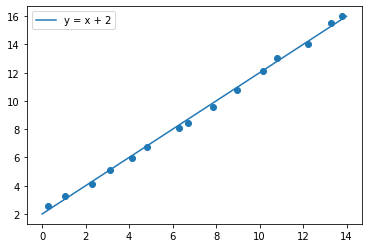

In [ ]:
plt.pyplot.scatter(x,y)
plt.pyplot.plot(np.arange(15), np.arange(2,17), label = "y = x + 2")
plt.pyplot.legend()

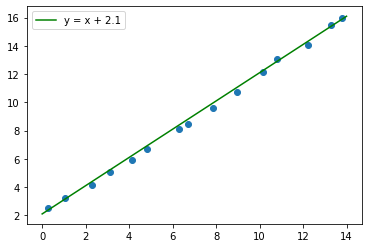

In [ ]:
plt.pyplot.scatter(x,y)
plt.pyplot.plot(np.arange(15), np.add(np.arange(2,17), 0.1), color = 'green', label = "y = x + 2.1")
plt.pyplot.legend()

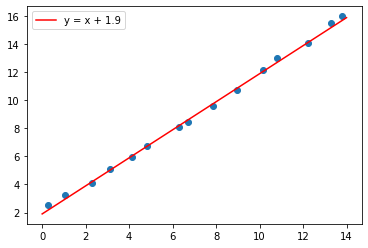

In [ ]:
plt.pyplot.scatter(x,y)
plt.pyplot.plot(np.arange(15), np.add(np.arange(2,17), -0.1), color = 'red', label = "y = x + 1.9")
plt.pyplot.legend()

the third graph seems to be the **best fit** for the data.  How do we really know?

`x + 2` is the  **predicted value**. We usualy use `y_hat` for the predicted value and `y` for the actual value in the data.


Let us add these predicted values to the table and compare it against actual values.

In [ ]:
df = df.assign(y_hat_1 = x + 2)
df = df.assign(y_hat_2 = x + 1.9)
df = df.assign(y_hat_3 = x + 2.1)

In [ ]:
df

,x,y,y_hat_1,y_hat_2,y_hat_3
0,10.17,12.14,12.17,12.07,12.27
1,3.13,5.09,5.13,5.03,5.23
2,6.70,8.44,8.70,8.60,8.80
3,4.12,5.93,6.12,6.02,6.22
4,13.29,15.51,15.29,15.19,15.39
5,1.03,3.24,3.03,2.93,3.13
6,0.28,2.54,2.28,2.18,2.38
7,10.82,13.04,12.82,12.72,12.92
8,13.80,16.00,15.80,15.70,15.90
9,2.28,4.14,4.28,4.18,4.38


## Error

Some models are better for some values, other models are better for other values.  Let us calculate the errors for these values.

For now, let us use the square of the difference of the values as the error for one data point.  That is, `(y_hat - y)**2`.

We will then use the sum of these values over the entire dataset to determine the overall error of the model for the dataset.

In [ ]:
df = df.assign(error_1 = (df.y_hat_1 - df.y)**2)
df = df.assign(error_2 = (df.y_hat_2 - df.y)**2)
df = df.assign(error_3 = (df.y_hat_3 - df.y)**2)

In [ ]:
df

,x,y,y_hat_1,y_hat_2,y_hat_3,error_1,error_2,error_3
0,10.17,12.14,12.17,12.07,12.27,0.0009,0.0049,0.0169
1,3.13,5.09,5.13,5.03,5.23,0.0016,0.0036,0.0196
2,6.70,8.44,8.70,8.60,8.80,0.0676,0.0256,0.1296
3,4.12,5.93,6.12,6.02,6.22,0.0361,0.0081,0.0841
4,13.29,15.51,15.29,15.19,15.39,0.0484,0.1024,0.0144
5,1.03,3.24,3.03,2.93,3.13,0.0441,0.0961,0.0121
6,0.28,2.54,2.28,2.18,2.38,0.0676,0.1296,0.0256
7,10.82,13.04,12.82,12.72,12.92,0.0484,0.1024,0.0144
8,13.80,16.00,15.80,15.70,15.90,0.0400,0.0900,0.0100
9,2.28,4.14,4.28,4.18,4.38,0.0196,0.0016,0.0576


In [ ]:
df.error_1.sum()

0.555399999999999

In [ ]:
df.error_2.sum()

0.6134000000000001

In [ ]:
df.error_3.sum()

0.7974000000000003

## The best model

The best model is the one with the smallest error. The equation of the line is given by the parameters below. (We will look at how we get these values later.)

In [ ]:
#@title Find the best slope and intercept
X = df[['x']]
Y = df[['y']]
model = linear_module.LinearRegression()
reg = model.fit(X, Y)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [1.94702581]
slope [[1.00316359]]


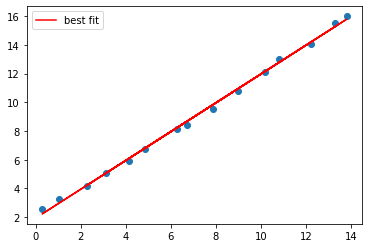

In [ ]:
plt.pyplot.scatter(x,y)
plt.pyplot.plot(x, x*1.003 + 1.947, color = 'red', label="best fit")
plt.pyplot.legend()

In [ ]:
df = df.assign(y_hat = 1.003*x + 1.947)
df = df.assign(error = (df.y_hat - df.y)**2)



In [ ]:
df

,x,y,y_hat_1,y_hat_2,y_hat_3,error_1,error_2,error_3,y_hat,error
0,10.17,12.14,12.17,12.07,12.27,0.0009,0.0049,0.0169,12.14751,0.000056
1,3.13,5.09,5.13,5.03,5.23,0.0016,0.0036,0.0196,5.08639,0.000013
2,6.70,8.44,8.70,8.60,8.80,0.0676,0.0256,0.1296,8.66710,0.051574
3,4.12,5.93,6.12,6.02,6.22,0.0361,0.0081,0.0841,6.07936,0.022308
4,13.29,15.51,15.29,15.19,15.39,0.0484,0.1024,0.0144,15.27687,0.054350
5,1.03,3.24,3.03,2.93,3.13,0.0441,0.0961,0.0121,2.98009,0.067553
6,0.28,2.54,2.28,2.18,2.38,0.0676,0.1296,0.0256,2.22784,0.097444
7,10.82,13.04,12.82,12.72,12.92,0.0484,0.1024,0.0144,12.79946,0.057859
8,13.80,16.00,15.80,15.70,15.90,0.0400,0.0900,0.0100,15.78840,0.044775
9,2.28,4.14,4.28,4.18,4.38,0.0196,0.0016,0.0576,4.23384,0.008806


The error of the best fit is less than the previously guessed best value of 2.

In [ ]:
df.error.sum()

0.5385805490999993

In [ ]:
df.error_1.sum()

0.555399999999999